## Mitsiu Alejandro Carreño Sarabia - E23S-18014

Entrena un perceptrón para predecir el precio de las viviendas en el ejercicio de clase (california_housing)     
En clase solo utilizamos una variable, adapta el método par utilizar mas de una. Tu decides cuales.   
Recuerda lo aprendido en Sistemas Inteligentes acerca de la preparación de los datos.    
No olvides normalizar las variables     
Evalúa su desempeño y da tus conclusiones (esta parte es importante)     
Entrega un cuaderno de colab con tu código y tus comentarios.      

## 1.- Carga y exploración inicial

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target

In [3]:
print(data.feature_names)
print(y.shape)
print(X.shape)
print(data.DESCR)
x1 = X[:,2]  # Average number of rooms per household
x2 = X[:, 5] # Average number of household members

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640,)
(20640, 8)
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median ho

In [4]:
def DrawScatter(x, y, title, xlabel=None, ylabel=None):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, alpha=0.5)
    plt.title(title)
    plt.xlabel(title.split("vs")[0].strip().capitalize())
    plt.ylabel(title.split("vs")[1].strip().capitalize())
    plt.show()

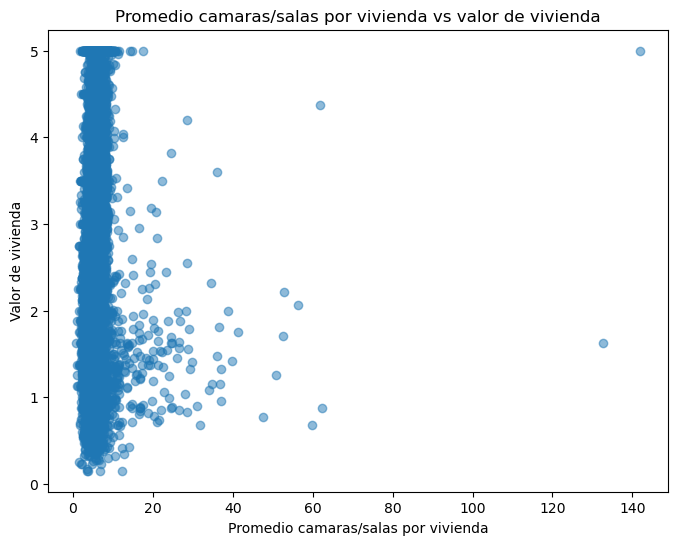

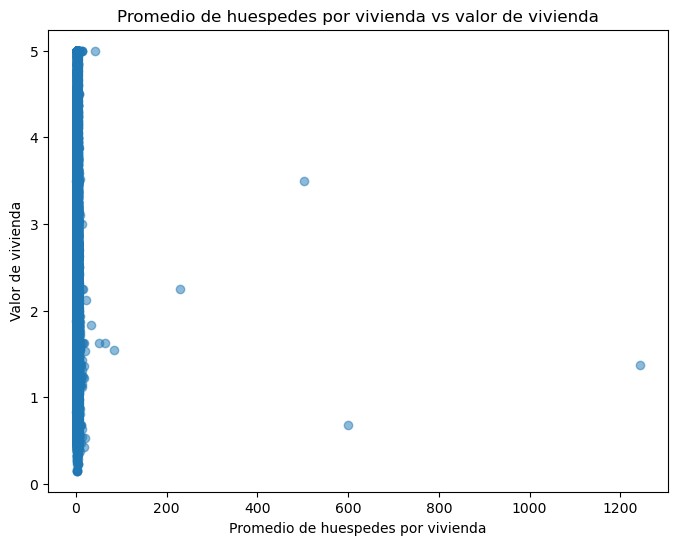

In [5]:
DrawScatter(x1, y, "Promedio camaras/salas por vivienda vs valor de vivienda")
DrawScatter(x2, y, "Promedio de huespedes por vivienda vs valor de vivienda")

## 2. Limpieza y normalización de datos

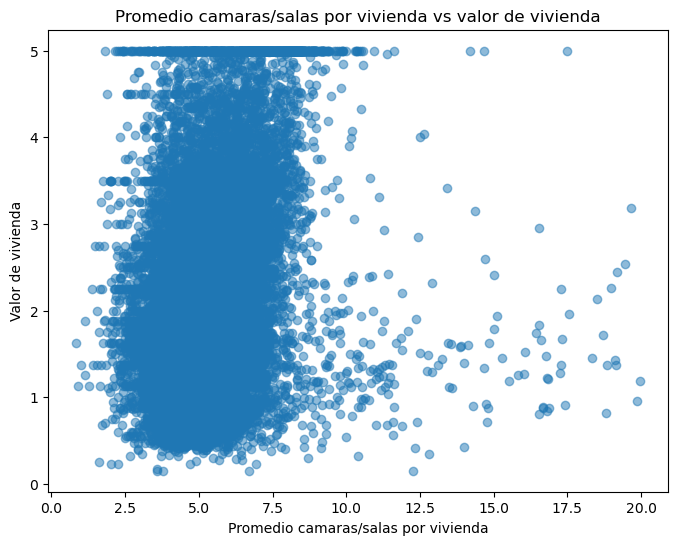

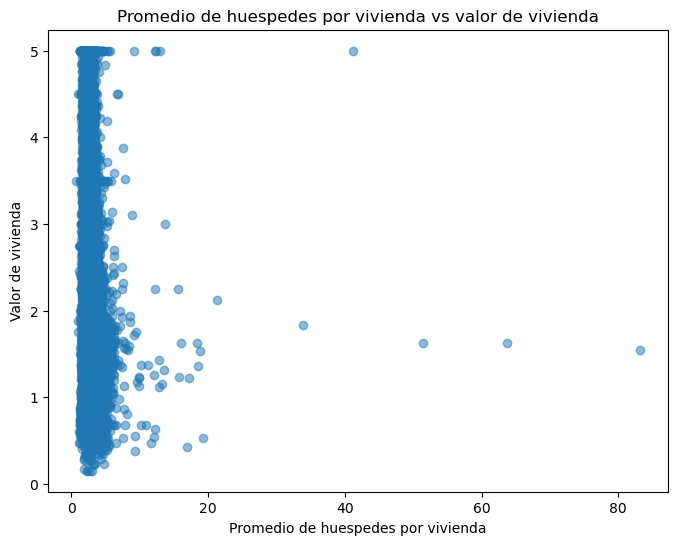

In [6]:
outliers_index = np.where(x1 > 20)[0]  #x1 outliers
outliers_index = np.concatenate((outliers_index, np.where(x2 > 200)[0]))  #x2 outliers

clean_x1 = np.delete(x1, outliers_index)
clean_x2 = np.delete(x2, outliers_index)
clean_y = np.delete(y, outliers_index)

DrawScatter(clean_x1, clean_y, "Promedio camaras/salas por vivienda vs valor de vivienda")
DrawScatter(clean_x2, clean_y, "Promedio de huespedes por vivienda vs valor de vivienda")

In [7]:
'''
from sklearn import preprocessing

norm_x1 = scaler.fit_transform(clean_x1.reshape(1, -1))
#norm_x2 = scaler.fit_transform(clean_x2.reshape(1, -1))

DrawScatter(norm_x1, clean_y, "Promedio camaras/salas por vivienda vs valor de vivienda")
#DrawScatter(norm_x2, clean_y, "Promedio de huespedes por vivienda vs valor de vivienda")
'''

'\nfrom sklearn import preprocessing\n\nnorm_x1 = scaler.fit_transform(clean_x1.reshape(1, -1))\n#norm_x2 = scaler.fit_transform(clean_x2.reshape(1, -1))\n\nDrawScatter(norm_x1, clean_y, "Promedio camaras/salas por vivienda vs valor de vivienda")\n#DrawScatter(norm_x2, clean_y, "Promedio de huespedes por vivienda vs valor de vivienda")\n'

In [8]:
def lineal(x):
    return x

longitud_entrada = 2
pesos = np.random.rand(longitud_entrada)
bias = np.random.rand()
func_activacion = lineal
epochs = 50
tasa_aprendiz = 0.001

In [9]:
def calcular_neurona(entradas, pesos, bias, func_activacion):
    suma = np.dot(entradas, pesos) + bias
    salida = func_activacion(suma)
    return salida

for _ in range(epochs):
    for entrada, salida_esperada in zip(zip(clean_x1, clean_x2), clean_y):
        salida = calcular_neurona(entrada, pesos, bias, func_activacion)
        error = salida_esperada - salida
        pesos = pesos + error * entrada[0] * entrada[1] * tasa_aprendiz
        bias = bias + error * tasa_aprendiz
    print(pesos, bias)
    

[-0.24315038  0.07538682] 2.130571736158361
[-0.27531802  0.04321917] 2.404678886573391
[-0.2824735   0.03606369] 2.465652172961841
[-0.28406518  0.03447201] 2.4792152691721165
[-0.28441924  0.03411795] 2.4822322884227916
[-0.284498    0.03403919] 2.4829034040012368
[-0.28451552  0.03402167] 2.48305268913409
[-0.28451942  0.03401777] 2.4830858966047478
[-0.28452029  0.03401691] 2.4830932833825683
[-0.28452048  0.03401671] 2.4830949265214555
[-0.28452052  0.03401667] 2.4830952920266367
[-0.28452053  0.03401666] 2.4830953733307704
[-0.28452053  0.03401666] 2.4830953914163514
[-0.28452053  0.03401666] 2.4830953954393538
[-0.28452053  0.03401666] 2.483095396334245
[-0.28452053  0.03401666] 2.483095396533298
[-0.28452053  0.03401666] 2.4830953965775824
[-0.28452053  0.03401666] 2.483095396587461
[-0.28452053  0.03401666] 2.4830953965896483
[-0.28452053  0.03401666] 2.4830953965901337
[-0.28452053  0.03401666] 2.483095396590256
[-0.28452053  0.03401666] 2.4830953965902847
[-0.28452053  0.034

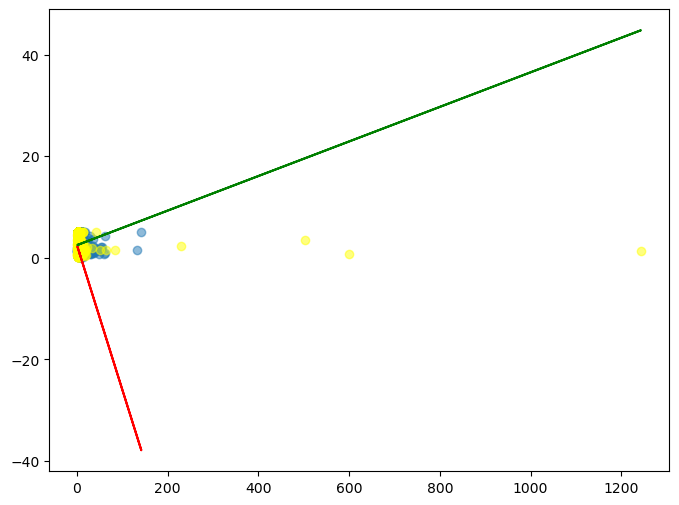

In [10]:
def linea(x, peso, bias):
    return peso * x + bias

plt.figure(figsize=(8,6))
plt.scatter(x1, y, alpha=0.5, label="Datos")
plt.scatter(x2, y, alpha=0.5, color="yellow", label="Datos")
plt.plot(x1, linea(x1, pesos[0], bias), color="r", label="Línea x1")
plt.plot(x2, linea(x2, pesos[1], bias), color="g", label="Línea x2")
plt.show()

## Conclusiones

Al elegir las variables de número de cuartos y número de habitantes por vivienda, esperaba que existiera una correlación entre las casas más grandes y su valor. Medianamente existirá esta correlación, probablemente porque un factor ignorado en este análisis es la ubicación geográfica, (la cercanía a la costa aumenta el precio con mayor influencia que el tamaño de la casa misma). Para hacer el análisis se incrementaron los epochs (a 50) lo cuál genera un resultado muy distinto a los 10 iniciales, pasando de una regresión negativa a positiva. Finalmente debo admitir que el pasar de un vector unidimensional en los pesos y entradas, a uno bidimensional, me causo problemas en entender cómo se debe graficar, o que tratamiento debe darse a los pesos. De manera similar en cómo tratar el cálculo del nuevo peso, ¿se debe sumar ambas entradas? o ¿ambas multiplicar por el error previo?.

